In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


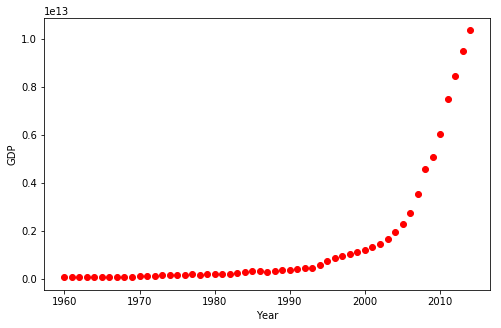

In [54]:
plt.figure(figsize=(8,5))
x_data = df["Year"].values
y_data = df["Value"].values
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [55]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

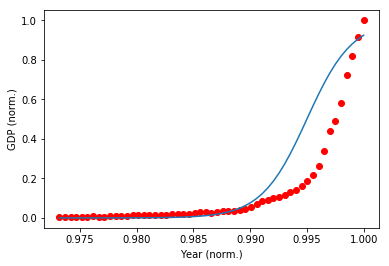

In [56]:
x_data_norm = x_data/max(x_data)
y_data_norm = y_data/max(y_data)
plt.plot(x_data_norm, y_data_norm, 'ro')
plt.ylabel('GDP (norm.)')
plt.xlabel('Year (norm.)')
beta_1 = 500
beta_2 = 0.995
#logistic function
y_pred_init = sigmoid(x_data_norm, beta_1 , beta_2)
#plot initial prediction against datapoints
plt.plot(x_data_norm, y_pred_init)
plt.show()

In [57]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_data_norm, y_data_norm, p0=[beta_1,beta_2])
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453171, beta_2 = 0.997207


[0.0057156  0.00478589 0.00450854 0.00483806 0.00570384 0.00673204
 0.00732793 0.00695878 0.0067595  0.00760213 0.00883705 0.00951846
 0.01083164 0.01320831 0.01373801 0.01556399 0.01464318 0.01664431
 0.01432975 0.01707961 0.01831512 0.01877086 0.01965745 0.02211047
 0.02492384 0.02969431 0.02885665 0.02620514 0.03000746 0.03341025
 0.03466722 0.03683833 0.04103727 0.04276985 0.0542994  0.07069473
 0.08313453 0.09253259 0.09901435 0.10521147 0.11639597 0.12865827
 0.1411811  0.15933902 0.18752073 0.21908602 0.26362418 0.34023675
 0.44022261 0.48860473 0.58326959 0.7235687  0.81716665 0.91653856
 1.        ]
[4.49475503e-08 6.37199944e-08 9.03327906e-08 1.28060479e-07
 1.81545215e-07 2.57367962e-07 3.64858230e-07 5.17242010e-07
 7.33269138e-07 1.03952032e-06 1.47367768e-06 2.08916118e-06
 2.96170145e-06 4.19865752e-06 5.95222582e-06 8.43816532e-06
 1.19623418e-05 1.69583560e-05 2.40408812e-05 3.40812670e-05
 4.83146970e-05 6.84920566e-05 9.70951403e-05 1.37641562e-04
 1.95116653e-04 2.

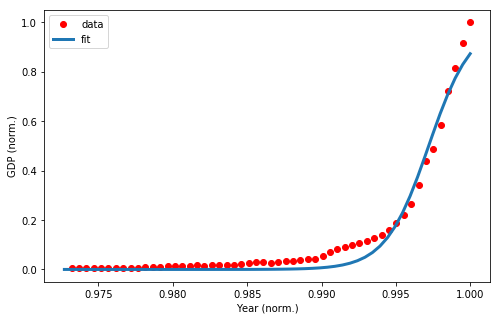

In [58]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
print (y_data_norm)
print (y)
plt.plot(x_data_norm, y_data_norm, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP (norm.)')
plt.xlabel('Year (norm.)')
plt.show()

55 46 9


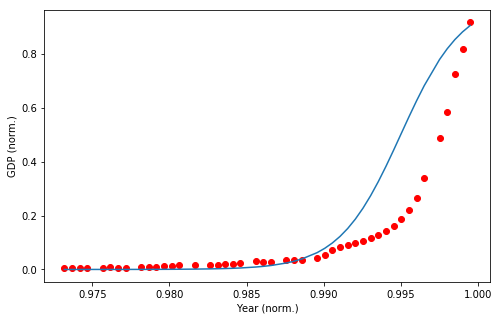

In [65]:
msk = np.random.rand(len(x_data_norm)) < 0.8
x_train = x_data_norm[msk]
x_test  = x_data_norm[~msk]
y_train = y_data_norm[msk]
y_test  = y_data_norm[~msk]
print (len(x_data_norm),len(x_train),len(x_test))

plt.figure(figsize=(8,5))
plt.plot(x_train, y_train, 'ro')

beta_1 = 500
beta_2 = 0.995
#logistic function
y_pred_init = sigmoid(x_train, beta_1, beta_2)
#plot initial prediction against datapoints
plt.plot(x_train, y_pred_init)
plt.ylabel('GDP (norm.)')
plt.xlabel('Year (norm.)')
plt.show()

 beta_1 = 637.761216, beta_2 = 0.997234
[0.0057156  0.00478589 0.00450854 0.00483806 0.00673204 0.00732793
 0.00695878 0.0067595  0.00883705 0.00951846 0.01083164 0.01320831
 0.01373801 0.01556399 0.01664431 0.01707961 0.01831512 0.01877086
 0.01965745 0.02211047 0.02969431 0.02885665 0.02620514 0.03341025
 0.03466722 0.03683833 0.04276985 0.0542994  0.07069473 0.08313453
 0.09253259 0.09901435 0.10521147 0.11639597 0.12865827 0.1411811
 0.15933902 0.18752073 0.21908602 0.26362418 0.34023675 0.48860473
 0.58326959 0.7235687  0.81716665 0.91653856]
[1.60660262e-07 2.21774243e-07 3.06135527e-07 4.22587206e-07
 5.83336212e-07 8.05232886e-07 1.11153728e-06 1.53435733e-06
 2.11801446e-06 2.92368941e-06 4.03583511e-06 5.57102888e-06
 7.69019146e-06 1.06154533e-05 1.46534354e-05 2.02273829e-05
 2.79215174e-05 3.85422502e-05 5.32026619e-05 7.34390814e-05
 1.01371942e-04 1.39927696e-04 1.93144893e-04 2.66596219e-04
 3.67970165e-04 5.07872252e-04 7.00927750e-04 9.67297660e-04
 1.33475953e-03 1.8

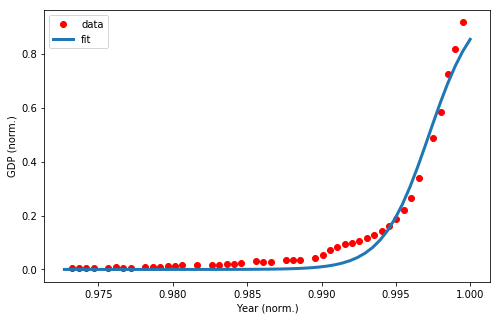

In [66]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_train, y_train, p0=[beta_1,beta_2])
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

print (y_train)

x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)
print (y)

plt.figure(figsize=(8,5))
plt.plot(x_train, y_train, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP (norm.)')
plt.xlabel('Year (norm.)')
plt.show()

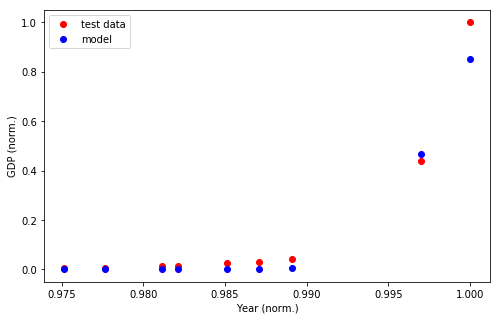

Residual sum of squares: 0.0028
R2-score: 0.9663


In [67]:
#x = np.linspace(1960, 2015, 55)
#x = x/max(x)
#y = sigmoid(x, *popt)
#plt.plot(x,y, linewidth=3.0, label='fit')
y_hat = sigmoid(x_test, *popt)

plt.figure(figsize=(8,5))
plt.plot(x_test, y_test, 'ro', label='test data')
plt.plot(x_test, y_hat, 'bo', label='model')
plt.legend(loc='best')
plt.ylabel('GDP (norm.)')
plt.xlabel('Year (norm.)')
plt.show()

from sklearn.metrics import r2_score
print( "Residual sum of squares: %.4f" % np.mean( (y_hat - y_test) ** 2 ) )
print( "R2-score: %.4f" % r2_score(y_hat , y_test) )